# The SimIM Interface for Halo Catalogs

One of **SimIM**'s features is a uniform format for cosmological simulations. 
Once simulations are written into this format the ``simim.siminterface.simhandler`` 
class can interface with any simulation in a homogeneous manner.

This tutorial demonstrates some basic features of the simhandlers and 
snaphandlers **SimIM** uses. Many of these concepts can also be applied
to interacting with light cones built in **SimIM**.

In this example and throughout the **SimIM** documentation we use 
TNG100-3-Dark simulation. This is a simulation box with 100 Mpc 
sides, a dark matter particle mass of $4\times10^8$ $M_\odot$, and 
no Baryonic physics. We use this simulation because the total data 
volume is relatively small (~3 GB compared to ~1 TB for the full 
physics, full resolution TNG300-1 simulation). For most scientific
applications it is advisable to utilize a higher resolution simulation.
However the smaller, low-resolution TNG100-3 can be downloaded, 
formatted, and loaded much more quickly, making it useful for 
demonstration and testing purposes.

In [ ]:
import numpy as np

# We've downloaded and formatted the TNG100-3-Dark simulation
# in a previous tutorial. Now we can simply initialize a 
# simhandler and hit the ground running
import simim.siminterface as sim
tng100 = sim.simhandler('TNG100-3-Dark')

## Simulation and Snapshot Metadata

A variety of metadata is stored in the simhandler instance:

In [ ]:
for key, value in tng100.metadata:
    print(f"{key}: {value}")

Additionally, we can review the fields in the halo catalogs:

In [ ]:
fields = [f for f in tng100.extract_keys()]
print(f"The halo catalog fields for this simulation are: " + ', '.join(fields))


Each simulation is composed of a series of snapshots which contain the halo
catalog frozen at a given point in time (or equivalently at a given redshift).
Because the simulations are large, by default the sim handler doesn't load 
the data for the snapshots - this is done to reduce memory usage since many 
applications don't require using data from all snapshots. To interact with 
data from an individual snapshot, we need to retrieve it.

First let's determine the snapshot associated with our redshift of interest.
We'll search for the snapshot closest to z=1.0:

In [ ]:
z = 1.0
snap = tng100.z_to_snap(z)
print(f"The snapshot closest to redshift {z :.1f} has index {snap}")

Now we can load this snapshot into memory. Each snapshot comes 
with its own snaphandler object which is used to store both metadata
and the halo catalog for that snapshot.

In [ ]:
tng100_z1 = tng100.get_snap(snap)

### Equivalently we could have used
# tng100_z1 = tng100.get_snap_from_z(z)

Snaphandlers still don't automatically load all of the data for a 
snapshot, again trying to save RAM because we're working with large
files. Instead they have a list of properties associated with the halo
catalog, which they will load as needed.

We can see the properties associated with a snapshot:

In [ ]:
fields = [f for f in tng100_z1.extract_keys()]
print("The halo catalog fields for this snapshot are: "+', '.join([f for f in fields]))

We can also specifically see what properties are loaded into memory, what properties 
are saved to the disk, and what additonal properties have been added since 
loading the snapshot, but aren't saved to the disk:

In [ ]:
fields = [f for f in tng100_z1.extract_keys(set='loaded')]
print("The loaded fields for this snapshot are: "+', '.join([f for f in fields]))

fields = [f for f in tng100_z1.extract_keys(set='saved')]
print("The saved fields for this snapshot are: "+', '.join([f for f in fields]))

fields = [f for f in tng100_z1.extract_keys(set='generated')]
print("The new fields for this snapshot are: "+', '.join([f for f in fields]))

We can load fields into memory explicity:

In [ ]:
tng100_z1.load_property('pos_x','pos_y','pos_z')

Now printing the loaded fields will list pos_x, pos_y, and pos_z. These are still on the disk
and therefore still appear in the saved fields list as well:

In [ ]:
fields = [f for f in tng100_z1.extract_keys(set='loaded')]
print("The loaded fields for this snapshot are: "+', '.join([f for f in fields]))

fields = [f for f in tng100_z1.extract_keys(set='saved')]
print("The saved fields for this snapshot are: "+', '.join([f for f in fields]))

fields = [f for f in tng100_z1.extract_keys(set='generated')]
print("The new fields for this snapshot are: "+', '.join([f for f in fields]))

We can also make simple plots of these properties. For instance, we can plot the x and y positions
of all halos:

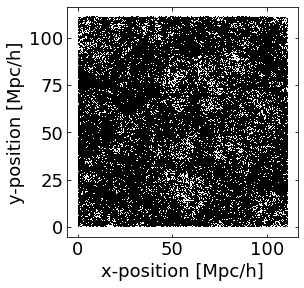

In [ ]:
tng100_z1.plot('pos_x','pos_y',
               axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal'},
               plotkws={'marker':',','color':'k'})

This plots all halos x- and y-positions. Because the box is thick in the z-direction 
as well, it can result in a very dense looking plot. We can fix this by restricting
the set of halos we use:

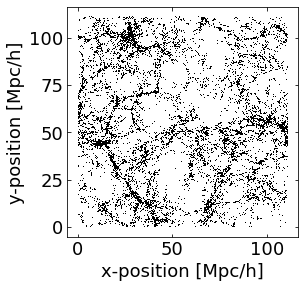

In [ ]:
tng100_z1.set_property_range('pos_z',0,10) # Restrict catalog to only halos with pos_z<10 Mpc/h
tng100_z1.plot('pos_x','pos_y',
               axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal'},
               plotkws={'marker':',','color':'k'})

To undo this restriction, simpy call ``set_property_range`` with no arguments. 
Note that by default ``set_property_range`` will overwrite the last set of 
restrictions set, so calling ``set_property_range('pos_x',0,10)`` followed by 
``set_property_range('pos_y',0,10)`` would result in the halo catalog being
restricted only along the y-direction and not the x direction:

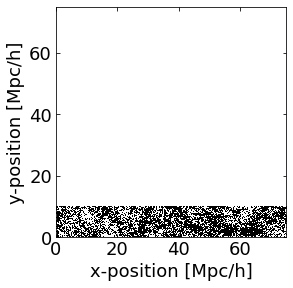

In [ ]:
tng100_z1.set_property_range('pos_x',0,10) # Restrict catalog to only halos with pos_x<10 Mpc/h
tng100_z1.plot('pos_x','pos_y',
                 axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal','xlim':[0,75],'ylim':[0,75]},
                 plotkws={'marker':',','color':'k'})

tng100_z1.set_property_range('pos_y',0,10) # Restrict catalog to only halos with pos_y<10 Mpc/h
tng100_z1.plot('pos_x','pos_y',
                 axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal','xlim':[0,75],'ylim':[0,75]},
                 plotkws={'marker':',','color':'k'})


To apply multiple cuts, set the ``reset`` parameter to ``False``:

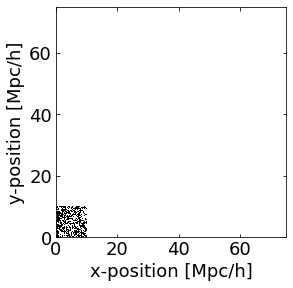

In [ ]:
tng100_z1.set_property_range('pos_x',0,10) # Restrict catalog to only halos with pos_x<10 Mpc/h
tng100_z1.set_property_range('pos_y',0,10,reset=False) # Restrict catalog to only halos with pos_y<10 Mpc/h
tng100_z1.plot('pos_x','pos_y',
                 axkws={'xlabel':'x-position [Mpc/h]','ylabel':'y-position [Mpc/h]','aspect':'equal','xlim':[0,75],'ylim':[0,75]},
                 plotkws={'marker':',','color':'k'})

In [ ]:
# Undo these cuts.
tng100_z1.set_property_range()

We can also make histograms. Here we'll plot the distribution of halo masses
in our catalog. We can see that below a mass of about $10^{10}$ $M_\odot$ the
low mass resolution of the TNG100-3 simulation results in a sharp fall off of the 
number of halos.

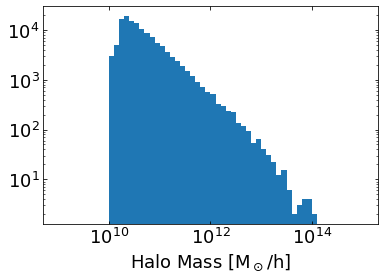

In [ ]:
tng100_z1.hist('mass',
                 axkws={'xlabel':'Halo Mass [M$_\odot$/h]','xscale':'log','yscale':'log'}, 
                 plotkws={'bins':np.logspace(9,15,61)})